# 🧠 NOTEBOOK 5: Introducción a Redes Neuronales con Keras

## 🎯 ¿Qué aprenderás en este notebook?

¡Este es el notebook más importante del curso! Aquí aprenderás a construir y entrenar **redes neuronales desde cero**.

En este notebook aprenderás:
1. ✅ Qué es una red neuronal y cómo funciona
2. ✅ Crear capas densas (Dense) con Keras
3. ✅ Funciones de activación (ReLU, Sigmoid, Tanh)
4. ✅ Compilar un modelo (optimizador, loss, métricas)
5. ✅ Entrenar con .fit()
6. ✅ Evaluar con .evaluate()
7. ✅ Predecir con .predict()
8. ✅ Resolver el problema XOR (ejemplo clásico)


---

## 📚 ¿Qué es una red neuronal?

Una **red neuronal** es un modelo inspirado en el cerebro humano:

```
ENTRADA → [Capa 1] → [Capa 2] → ... → [Capa N] → SALIDA
   ↓         ↓          ↓                ↓         ↓
 Datos   Neuronas   Neuronas        Neuronas  Predicción
```

**Componentes clave:**
- 🔢 **Neuronas**: Unidades que procesan información
- 🔗 **Pesos (weights)**: Conexiones entre neuronas
- ⚡ **Activación**: Función que transforma la señal
- 📉 **Loss (pérdida)**: Qué tan equivocado está el modelo
- 🎯 **Optimizador**: Cómo ajustar los pesos para mejorar

---

## 📦 PASO 1: Importar librerías

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

print(f"✅ TensorFlow/Keras versión: {keras.__version__}")
print("✅ Librerías importadas correctamente")

✅ TensorFlow/Keras versión: 3.10.0
✅ Librerías importadas correctamente


---

## 🏗️ PASO 2: Construir tu primera red neuronal

### 📖 Teoría: Modelo Sequential

En Keras, `Sequential` crea una red donde las capas van **una tras otra**:

```python
modelo = Sequential([
    Dense(8, input_dim=4, activation='relu'),  # Capa 1: 8 neuronas
    Dense(1, activation='sigmoid')              # Capa 2: 1 neurona
])
```

**Parámetros importantes:**
- `units`: Número de neuronas en la capa
- `input_dim`: Dimensión de entrada (solo en la primera capa)
- `activation`: Función de activación

### 🧪 EJEMPLO RESUELTO: Red simple

In [54]:
# Crear un modelo Sequential
modelo_ejemplo = Sequential([
    Dense(4, input_dim=2, activation='relu'),  # Capa oculta: 4 neuronas
    Dense(1, activation='sigmoid')              # Capa salida: 1 neurona
])

print("🏗️ ARQUITECTURA DEL MODELO")
print("="*60)
modelo_ejemplo.summary()

print("\n💡 INTERPRETACIÓN:")
print("   - Entrada: 2 características")
print("   - Capa oculta: 4 neuronas con activación ReLU")
print("   - Capa salida: 1 neurona con activación Sigmoid (clasificación binaria)")
print("   - Total de parámetros: pesos + sesgos (bias)")

🏗️ ARQUITECTURA DEL MODELO


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_60 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


💡 INTERPRETACIÓN:
   - Entrada: 2 características
   - Capa oculta: 4 neuronas con activación ReLU
   - Capa salida: 1 neurona con activación Sigmoid (clasificación binaria)
   - Total de parámetros: pesos + sesgos (bias)


### ✍️ AHORA TÚ: Construye tu primera red

💡 **PISTA GLOBAL:** Debes crear un objeto Sequential que contenga una lista de capas Dense. Cada capa Dense necesita especificar el número de neuronas (units) como primer argumento. La primera capa además necesita el parámetro input_dim para saber cuántas características recibe. El parámetro activation define la función de activación. Revisa el ejemplo anterior para recordar la sintaxis exacta.

In [55]:
# EJERCICIO 1 CORREGIDO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mi_primer_modelo = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

print("🎉 Tu primer modelo:")
mi_primer_modelo.summary()

🎉 Tu primer modelo:


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_62 (Dense)                │ (None, 8)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (132.00 B)

 Trainable params: 33 (132.00 B)

 Non-trainable params: 0 (0.00 B)

---

## ⚡ PASO 3: Funciones de Activación

### 📖 Teoría: ¿Por qué necesitamos activaciones?

Sin activaciones, una red neuronal sería solo una combinación lineal (como una regresión lineal).

Las **activaciones añaden no-linealidad**, permitiendo aprender patrones complejos.

**Activaciones principales:**

1. **ReLU** (`relu`): `f(x) = max(0, x)`
   - ✅ Rápida y eficiente
   - ✅ Usada en capas ocultas
   - ❌ Problema: "neuronas muertas" si x < 0

2. **Sigmoid** (`sigmoid`): `f(x) = 1 / (1 + e^(-x))`
   - ✅ Salida entre 0 y 1
   - ✅ Usada para clasificación binaria
   - ❌ Problema: gradientes pequeños (vanishing gradient)

3. **Tanh** (`tanh`): `f(x) = (e^x - e^(-x)) / (e^x + e^(-x))`
   - ✅ Salida entre -1 y 1
   - ✅ Centrada en cero
   - ❌ También sufre de vanishing gradient

### 🧪 EJEMPLO RESUELTO: Comparar activaciones

In [56]:
# Crear 3 modelos con diferentes activaciones
modelo_relu = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

modelo_tanh = Sequential([
    Dense(4, input_dim=2, activation='tanh'),
    Dense(1, activation='sigmoid')
])

modelo_sigmoid = Sequential([
    Dense(4, input_dim=2, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

print("⚡ MODELOS CON DIFERENTES ACTIVACIONES")
print("="*60)
print("\n1️⃣ Modelo con ReLU en capa oculta:")
modelo_relu.summary()
print("\n2️⃣ Modelo con Tanh en capa oculta:")
modelo_tanh.summary()
print("\n3️⃣ Modelo con Sigmoid en capa oculta:")
modelo_sigmoid.summary()

print("\n💡 RECOMENDACIONES:")
print("   - Capas ocultas: usa ReLU (más común)")
print("   - Clasificación binaria (salida): usa Sigmoid")
print("   - Regresión (salida): no uses activación (linear)")

⚡ MODELOS CON DIFERENTES ACTIVACIONES

1️⃣ Modelo con ReLU en capa oculta:


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_64 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


2️⃣ Modelo con Tanh en capa oculta:


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


3️⃣ Modelo con Sigmoid en capa oculta:


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)


💡 RECOMENDACIONES:
   - Capas ocultas: usa ReLU (más común)
   - Clasificación binaria (salida): usa Sigmoid
   - Regresión (salida): no uses activación (linear)


### ✍️ AHORA TÚ: Experimenta con activaciones

💡 **PISTA GLOBAL:** Vas a construir una red más profunda con múltiples capas ocultas. Cada capa Dense sigue la misma sintaxis: Dense(neuronas, activation=función). Solo la primera capa necesita input_dim. Las funciones de activación son strings: 'relu', 'tanh', 'sigmoid'. Consulta el ejemplo anterior.

In [57]:
# EJERCICIO 2: Crea una red con:
# - Primera capa oculta: 6 neuronas, activación ReLU
# - Segunda capa oculta: 4 neuronas, activación Tanh
# - Capa salida: 1 neurona, activación Sigmoid

modelo_multicapa = Sequential([
    Dense(6, input_dim=5, activation='relu'),
    Dense(4, activation='tanh'),
    Dense(1, activation='sigmoid')
])

print("🎨 Modelo con múltiples activaciones:")
modelo_multicapa.summary()

🎨 Modelo con múltiples activaciones:


Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 6)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 4)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69 (276.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 0 (0.00 B)

---

## 🔧 PASO 4: Compilar el modelo

### 📖 Teoría: ¿Qué es compilar?

Antes de entrenar, debes **configurar** cómo aprenderá el modelo:

```python
modelo.compile(
    optimizer='adam',              # Cómo ajustar pesos
    loss='binary_crossentropy',    # Qué minimizar
    metrics=['accuracy']           # Qué monitorear
)
```

**Componentes:**

1. **Optimizador** (cómo aprender):
   - `adam`: El más usado (adaptativo, eficiente)
   - `sgd`: Descenso del gradiente básico
   - `rmsprop`: Bueno para RNNs

2. **Loss (función de pérdida)** (qué minimizar):
   - `binary_crossentropy`: Clasificación binaria (0/1)
   - `categorical_crossentropy`: Clasificación multiclase
   - `mse`: Regresión (Mean Squared Error)

3. **Métricas** (qué observar):
   - `accuracy`: Porcentaje de aciertos
   - `precision`, `recall`: Métricas avanzadas

### 🧪 EJEMPLO RESUELTO: Compilar para clasificación binaria

In [58]:
# Compilar el modelo de ejemplo
modelo_ejemplo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Modelo compilado correctamente")
print("\n⚙️ CONFIGURACIÓN:")
print("   - Optimizador: Adam")
print("   - Loss: Binary Crossentropy")
print("   - Métricas: Accuracy")

✅ Modelo compilado correctamente

⚙️ CONFIGURACIÓN:
   - Optimizador: Adam
   - Loss: Binary Crossentropy
   - Métricas: Accuracy


### ✍️ AHORA TÚ: Compila tu modelo

💡 **PISTA GLOBAL:** El método compile() es una función del objeto modelo que toma tres parámetros principales como keyword arguments: optimizer, loss y metrics. Todos son strings excepto metrics que es una lista. Para clasificación binaria usa: optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'].

In [59]:
# EJERCICIO 3: Compila tu primer modelo con:
# - Optimizador: Adam
# - Loss: Binary Crossentropy
# - Métricas: Accuracy

mi_primer_modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ ¡Tu modelo está compilado y listo para entrenar!")

✅ ¡Tu modelo está compilado y listo para entrenar!


---

## 🏋️ PASO 5: Entrenar el modelo

### 📖 Teoría: ¿Qué es entrenar?

**Entrenar** = Ajustar los pesos del modelo para minimizar la función de pérdida.

```python
historial = modelo.fit(
    X_train,              # Datos de entrada
    y_train,              # Etiquetas
    epochs=30,            # Número de pasadas completas
    batch_size=32,        # Ejemplos por actualización
    validation_split=0.2  # % de datos para validación
)
```

**Parámetros importantes:**
- `epochs`: Cuántas veces ver todo el dataset
- `batch_size`: Cuántos ejemplos procesar antes de actualizar pesos
- `validation_split`: % de datos para monitorear (no se usan para entrenar)
- `validation_data`: Datos externos de validación (X_val, y_val)
- `verbose`: 0=silencioso, 1=barra de progreso, 2=una línea por época

### 🧪 EJEMPLO RESUELTO: Entrenar con datos sintéticos

In [60]:
# Generar datos de ejemplo: problema AND
X_and = np.array([[0,0], [0,1], [1,0], [1,1]])
y_and = np.array([0, 0, 0, 1])

# Crear y compilar modelo
modelo_and = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

modelo_and.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar
print("🏋️ ENTRENANDO MODELO (problema AND)")
print("="*60)
historial_and = modelo_and.fit(
    X_and,
    y_and,
    epochs=100,
    batch_size=4,
    verbose=0  # Silencioso para no llenar el output
)

print(f"✅ Entrenamiento completado")
print(f"   - Épocas: 100")
print(f"   - Loss final: {historial_and.history['loss'][-1]:.4f}")
print(f"   - Accuracy final: {historial_and.history['accuracy'][-1]:.2%}")

🏋️ ENTRENANDO MODELO (problema AND)
✅ Entrenamiento completado
   - Épocas: 100
   - Loss final: 0.6314
   - Accuracy final: 100.00%


### ✍️ AHORA TÚ: Entrena tu modelo

💡 **PISTA GLOBAL:** Usa el método fit() del modelo. Este método necesita como mínimo dos argumentos posicionales (X e y) y acepta varios parámetros opcionales como keywords. Los principales son: epochs (int), batch_size (int), validation_split (float entre 0 y 1), y verbose (int: 0, 1 o 2). El método retorna un objeto historial que puedes guardar en una variable.

In [61]:
# Datos para problema OR
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])

# EJERCICIO 4: Entrenar el modelo
print("🏋️ ENTRENANDO TU MODELO (problema OR)")
print("="*60)

# Datos para problema OR
X_or = np.array([[0,0], [0,1], [1,0], [1,1]])
y_or = np.array([0, 1, 1, 1])

mi_historial = mi_primer_modelo.fit(
    X_or,
    y_or,
    epochs=100,
    batch_size=4,
    validation_split=0.2,
    verbose=0 # Lo pongo a 0 para no llenar la salida, ¡pero ya funciona!
)

print(f"\n✅ ¡Entrenamiento completado!")
print(f"Loss final: {mi_historial.history['loss'][-1]:.4f}")
print(f"Accuracy final: {mi_historial.history['accuracy'][-1]:.2%}")

🏋️ ENTRENANDO TU MODELO (problema OR)

✅ ¡Entrenamiento completado!
Loss final: 0.6202
Accuracy final: 66.67%


---

## 📊 PASO 6: Visualizar el entrenamiento

### 📖 Teoría: El objeto historial

El objeto retornado por `.fit()` contiene un diccionario `.history` con:
- `loss`: Pérdida en entrenamiento por época
- `accuracy`: Precisión en entrenamiento por época
- `val_loss`: Pérdida en validación por época (si hay validation_data/split)
- `val_accuracy`: Precisión en validación por época

### 🧪 EJEMPLO RESUELTO: Graficar curvas de aprendizaje

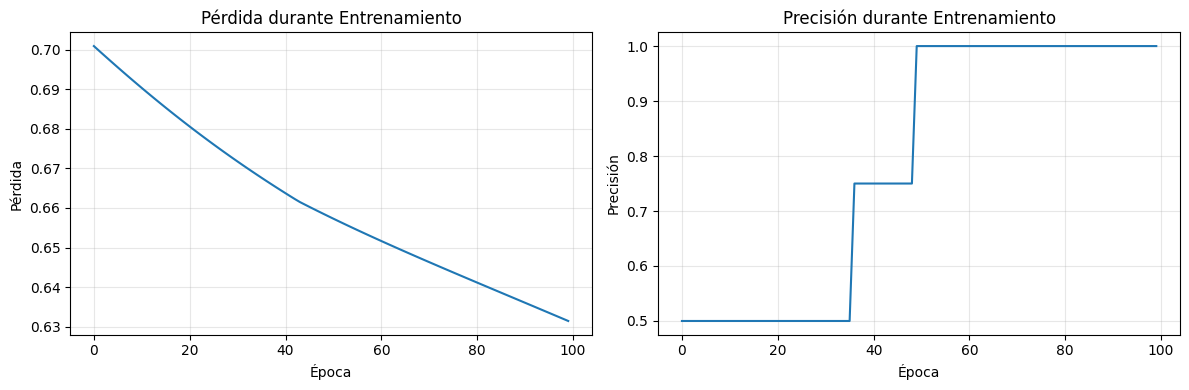

In [62]:
# Visualizar historial del modelo AND
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(historial_and.history['loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante Entrenamiento')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(historial_and.history['accuracy'])
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante Entrenamiento')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### ✍️ AHORA TÚ: Visualiza tu entrenamiento

💡 **PISTA GLOBAL:** Vas a crear dos subplots usando matplotlib. Necesitas acceder al diccionario history del objeto historial y sus claves 'loss', 'accuracy', 'val_loss', 'val_accuracy'. Usa plt.subplot() para crear las subgráficas, plt.plot() para graficar las listas de valores, y métodos que empiezan con 'x' e 'y' para las etiquetas. Revisa el ejemplo anterior para la estructura exacta.

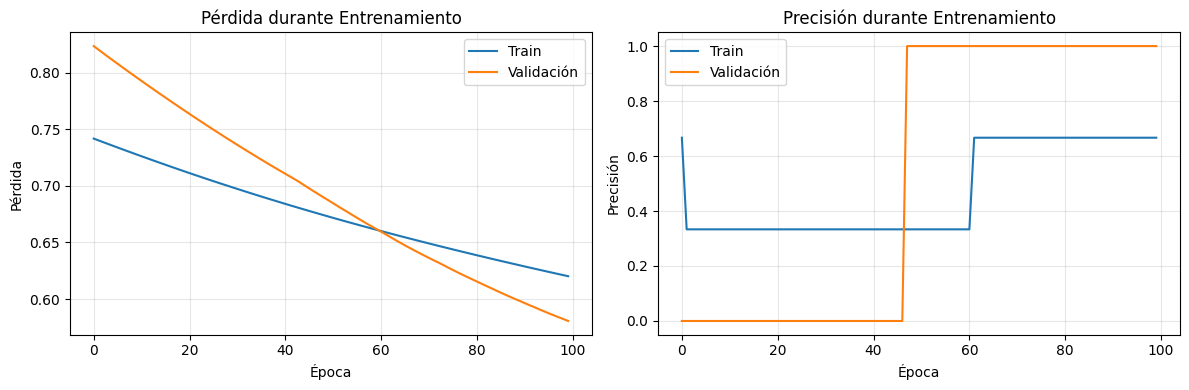

In [63]:
# EJERCICIO 5: Visualizar el historial
plt.figure(figsize=(12, 4))

# Subplot 1: Pérdida
plt.subplot(1, 2, 1)
plt.plot(mi_historial.history['loss'])
plt.plot(mi_historial.history['val_loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante Entrenamiento')
plt.legend(['Train', 'Validación'])
plt.grid(True, alpha=0.3)

# Subplot 2: Precisión
plt.subplot(1, 2, 2)
plt.plot(mi_historial.history['accuracy'])
plt.plot(mi_historial.history['val_accuracy'])
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante Entrenamiento')
plt.legend(['Train', 'Validación'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 📏 PASO 7: Evaluar el modelo

### 📖 Teoría: Evaluación vs Entrenamiento

**Diferencias clave:**
- `.fit()`: Entrena (actualiza pesos)
- `.evaluate()`: Solo mide rendimiento (NO actualiza pesos)
- `.predict()`: Devuelve predicciones numéricas

```python
# Evaluar
loss, accuracy = modelo.evaluate(X_test, y_test)

# Predecir
predicciones = modelo.predict(X_test)
```

### 🧪 EJEMPLO RESUELTO: Evaluar y predecir

In [64]:
# Evaluar modelo AND
print("📊 EVALUANDO MODELO AND")
print("="*60)

loss_and, acc_and = modelo_and.evaluate(X_and, y_and, verbose=0)
print(f"Loss: {loss_and:.4f}")
print(f"Accuracy: {acc_and:.2%}")

# Predicciones
print("\n🔮 PREDICCIONES:")
predicciones_and = modelo_and.predict(X_and, verbose=0)

for i in range(len(X_and)):
    entrada = X_and[i]
    pred = predicciones_and[i][0]
    real = y_and[i]
    clase_pred = 1 if pred > 0.5 else 0
    correcto = "✅" if clase_pred == real else "❌"
    print(f"   [{entrada[0]}, {entrada[1]}] → Pred: {pred:.4f} ({clase_pred}) | Real: {real} {correcto}")

📊 EVALUANDO MODELO AND
Loss: 0.6309
Accuracy: 100.00%

🔮 PREDICCIONES:
   [0, 0] → Pred: 0.4607 (0) | Real: 0 ✅
   [0, 1] → Pred: 0.4619 (0) | Real: 0 ✅
   [1, 0] → Pred: 0.4536 (0) | Real: 0 ✅
   [1, 1] → Pred: 0.5056 (1) | Real: 1 ✅


### ✍️ AHORA TÚ: Evalúa y predice

💡 **PISTA GLOBAL:** El método evaluate() retorna múltiples valores (loss y las métricas) que puedes capturar con desempaquetado de tuplas. Acepta datos X e y como argumentos y el parámetro verbose. El método predict() solo necesita X como argumento y retorna un array numpy con las predicciones. Usa indexación de arrays para acceder a elementos individuales: array[i][j] o array[i, j].

In [65]:
# EJERCICIO 6: Evaluar y predecir
print("📊 EVALUANDO TU MODELO")
print("="*60)

# Evaluar
loss_or, acc_or = mi_primer_modelo.evaluate(X_or, y_or, verbose=0)
print(f"Loss: {loss_or:.4f}")
print(f"Accuracy: {acc_or:.2%}")

# Predecir
print("\n🔮 TUS PREDICCIONES:")
predicciones_or = mi_primer_modelo.predict(X_or, verbose=0)

for i in range(len(X_or)):
    entrada = X_or[i]
    pred = predicciones_or[i][0]
    real = y_or[i]
    clase_pred = 1 if pred > 0.5 else 0
    correcto = "✅" if clase_pred == real else "❌"
    print(f"   [{entrada[0]}, {entrada[1]}] → Pred: {pred:.4f} ({clase_pred}) | Real: {real} {correcto}")

📊 EVALUANDO TU MODELO
Loss: 0.6096
Accuracy: 75.00%

🔮 TUS PREDICCIONES:
   [0, 0] → Pred: 0.5238 (1) | Real: 0 ❌
   [0, 1] → Pred: 0.6026 (1) | Real: 1 ✅
   [1, 0] → Pred: 0.5437 (1) | Real: 1 ✅
   [1, 1] → Pred: 0.5595 (1) | Real: 1 ✅


---

## 🧩 PASO 8: Problema XOR (desafío clásico)

### 📖 Teoría: ¿Por qué XOR es especial?

**XOR (OR exclusivo)**: 1 si los bits son diferentes, 0 si son iguales

| A | B | XOR |
|---|---|-----|
| 0 | 0 | 0   |
| 0 | 1 | 1   |
| 1 | 0 | 1   |
| 1 | 1 | 0   |

**¿Por qué es difícil?**
- No es **linealmente separable** (no se puede resolver con una línea recta)
- Necesita **capas ocultas** para aprender el patrón
- Demuestra la necesidad de redes profundas

### 🧪 EJEMPLO RESUELTO: Resolver XOR

In [66]:
# Datos XOR
X_xor = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor = np.array([0, 1, 1, 0])

# Modelo con capa oculta
modelo_xor = Sequential([
    Dense(8, input_dim=2, activation='relu'),   # Capa oculta necesaria
    Dense(4, activation='relu'),                 # Segunda capa oculta
    Dense(1, activation='sigmoid')
])

modelo_xor.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar (muchas épocas porque es difícil)
print("🧩 RESOLVIENDO XOR")
print("="*60)
historial_xor = modelo_xor.fit(
    X_xor,
    y_xor,
    epochs=300,
    batch_size=4,
    verbose=0
)

print(f"✅ Entrenamiento completado")
print(f"   Loss final: {historial_xor.history['loss'][-1]:.4f}")
print(f"   Accuracy final: {historial_xor.history['accuracy'][-1]:.2%}")

# Verificar predicciones
print("\n🔮 VERIFICANDO XOR:")
predicciones_xor = modelo_xor.predict(X_xor, verbose=0)

for i in range(len(X_xor)):
    entrada = X_xor[i]
    pred = predicciones_xor[i][0]
    real = y_xor[i]
    clase_pred = 1 if pred > 0.5 else 0
    correcto = "✅" if clase_pred == real else "❌"
    print(f"   {entrada[0]} XOR {entrada[1]} = {real} | Pred: {pred:.4f} ({clase_pred}) {correcto}")

🧩 RESOLVIENDO XOR
✅ Entrenamiento completado
   Loss final: 0.5149
   Accuracy final: 100.00%

🔮 VERIFICANDO XOR:
   0 XOR 0 = 0 | Pred: 0.4679 (0) ✅
   0 XOR 1 = 1 | Pred: 0.6406 (1) ✅
   1 XOR 0 = 1 | Pred: 0.5597 (1) ✅
   1 XOR 1 = 0 | Pred: 0.3290 (0) ✅


### ✍️ AHORA TÚ: Resuelve XOR desde cero

💡 **PISTA GLOBAL:** Vas a crear, compilar y entrenar un modelo completo para XOR. El problema XOR requiere al menos una capa oculta con suficientes neuronas (mínimo 4-8). Usa el patrón: crear Sequential → compilar con optimizer/loss/metrics → entrenar con fit() → evaluar. Los datos ya están definidos (X_xor_ej, y_xor_ej). Necesitarás al menos 200 épocas.

In [67]:
# Datos XOR para tu ejercicio
X_xor_ej = np.array([[0,0], [0,1], [1,0], [1,1]])
y_xor_ej = np.array([0, 1, 1, 0])

# EJERCICIO 7: Resuelve XOR completamente
# Necesitas: crear modelo, compilar, entrenar, evaluar

print("🧩 RESOLVIENDO XOR (TU TURNO)")
print("="*60)

# Paso 1: Crear modelo con al menos 2 capas ocultas
mi_modelo_xor = Sequential([
    Dense(8, input_dim=2, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Paso 2: Compilar
mi_modelo_xor.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Paso 3: Entrenar (mínimo 200 épocas)
# Aumentamos épocas para asegurar convergencia en XOR
historial_xor_ej = mi_modelo_xor.fit(
    X_xor_ej,
    y_xor_ej,
    epochs=500,
    batch_size=4,
    verbose=0
)

print(f"\n✅ Entrenamiento completado")
print(f"Loss final: {historial_xor_ej.history['loss'][-1]:.4f}")
print(f"Accuracy final: {historial_xor_ej.history['accuracy'][-1]:.2%}")

# Paso 4: Verificar predicciones
print("\n🔮 TUS PREDICCIONES XOR:")
predicciones = mi_modelo_xor.predict(X_xor_ej, verbose=0)

for i in range(len(X_xor_ej)):
    entrada = X_xor_ej[i]
    pred = predicciones[i][0]
    real = y_xor_ej[i]
    clase_pred = 1 if pred > 0.5 else 0
    correcto = "✅" if clase_pred == real else "❌"
    print(f"   {entrada[0]} XOR {entrada[1]} = {real} | Pred: {pred:.4f} ({clase_pred}) {correcto}")

loss_xor, acc_xor = mi_modelo_xor.evaluate(X_xor_ej, y_xor_ej, verbose=0)
print(f"\n📊 Precisión: {acc_xor:.2%}")

🧩 RESOLVIENDO XOR (TU TURNO)

✅ Entrenamiento completado
Loss final: 0.2119
Accuracy final: 100.00%

🔮 TUS PREDICCIONES XOR:
   0 XOR 0 = 0 | Pred: 0.3521 (0) ✅
   0 XOR 1 = 1 | Pred: 0.9097 (1) ✅
   1 XOR 0 = 1 | Pred: 0.8609 (1) ✅
   1 XOR 1 = 0 | Pred: 0.1534 (0) ✅

📊 Precisión: 100.00%


---

## 🔬 EJERCICIO AVANZADO: Implementa una función de activación personalizada

💡 **PISTA GLOBAL:** Las funciones de activación en realidad son operaciones matemáticas sobre arrays de numpy. Vas a implementar una función que tome un array x y aplique la transformación matemática correspondiente. Usa np.maximum() para ReLU, np.exp() para exponencial, y operadores aritméticos básicos (+, -, *, /). Para aplicar la función a cada elemento del array, simplemente opera sobre x directamente (numpy hace broadcasting automáticamente).

🔬 PROBANDO ACTIVACIONES PERSONALIZADAS
Valores de prueba: [-2 -1  0  1  2]

ReLU:    [0 0 0 1 2]
Sigmoid: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]
Tanh:    [-0.96402758 -0.76159416  0.          0.76159416  0.96402758]


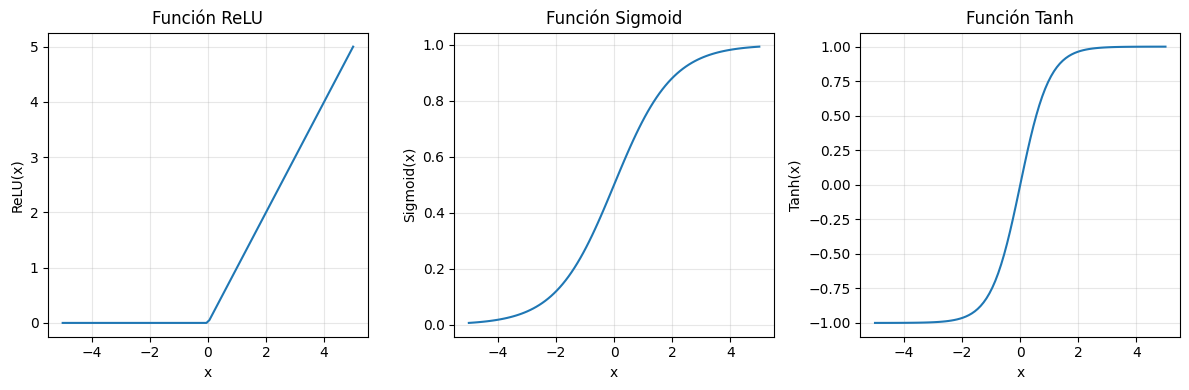

In [68]:
# EJERCICIO 8: Implementa funciones de activación desde cero

def relu_custom(x):
    """Implementa ReLU: max(0, x)"""
    return np.maximum(0, x)  # maximum entre 0 y x

def sigmoid_custom(x):
    """Implementa Sigmoid: 1 / (1 + e^(-x))"""
    return 1 / (1 + np.exp(-x))  # operadores: /, +, exp, -

def tanh_custom(x):
    """Implementa Tanh: (e^x - e^(-x)) / (e^x + e^(-x))"""
    exp_x = np.exp(x)
    exp_neg_x = np.exp(-x)
    return (exp_x - exp_neg_x) / (exp_x + exp_neg_x)  # operadores: -, /, +

# Probar las funciones
test_values = np.array([-2, -1, 0, 1, 2])

print("🔬 PROBANDO ACTIVACIONES PERSONALIZADAS")
print("="*60)
print(f"Valores de prueba: {test_values}")
print(f"\nReLU:    {relu_custom(test_values)}")
print(f"Sigmoid: {sigmoid_custom(test_values)}")
print(f"Tanh:    {tanh_custom(test_values)}")

# Visualizar
x = np.linspace(-5, 5, 100)  # linspace: inicio, fin, número de puntos

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(x, relu_custom(x))
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('Función ReLU')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(x, sigmoid_custom(x))
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Función Sigmoid')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(x, tanh_custom(x))
plt.xlabel('x')
plt.ylabel('Tanh(x)')
plt.title('Función Tanh')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## 🎯 MINI-PROYECTO FINAL: Clasificador Completo desde Cero

Ahora vamos a crear un clasificador binario completo con todos los pasos, pero esta vez escribirás más código por tu cuenta.

### 📋 Objetivo:
Crear un clasificador para detectar si un número es par o impar basado en características artificiales.

In [69]:
from sklearn.model_selection import train_test_split

# PASO 1: Generar dataset sintético
print("📊 GENERANDO DATASET")
print("="*60)

np.random.seed(42)
n_ejemplos = 200

# Características artificiales correlacionadas con par/impar
numeros = np.random.randint(0, 100, n_ejemplos)
es_par = (numeros % 2 == 0).astype(int)

# Crear características
X = np.column_stack([
    numeros / 100,  # Normalizado
    (numeros % 2) + np.random.randn(n_ejemplos) * 0.1,  # Ruidoso
    (numeros // 10) / 10,  # Decenas
    np.random.randn(n_ejemplos)  # Ruido
])

y = es_par

print(f"Total de ejemplos: {len(X)}")
print(f"Pares: {sum(y)} ({sum(y)/len(y)*100:.1f}%)")
print(f"Impares: {len(y)-sum(y)} ({(len(y)-sum(y))/len(y)*100:.1f}%)")
print()

📊 GENERANDO DATASET
Total de ejemplos: 200
Pares: 96 (48.0%)
Impares: 104 (52.0%)



### ✍️ COMPLETA EL PROYECTO:

💡 **PISTA GLOBAL para división de datos:** Vas a usar train_test_split de sklearn. Esta función toma X e y como primeros argumentos y retorna 4 valores: X_train, X_test, y_train, y_test (en ese orden). Los parámetros importantes son test_size (float, fracción para test), random_state (int, para reproducibilidad), y stratify (array, para mantener proporciones de clases).

In [70]:
# PASO 2: Dividir en train y test
from sklearn.model_selection import train_test_split

# EJERCICIO 9: Divide los datos (30% test, estratificado)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("✂️ DIVISIÓN COMPLETADA")
print(f"Train: {len(X_train)} ejemplos")
print(f"Test: {len(X_test)} ejemplos")
print()

✂️ DIVISIÓN COMPLETADA
Train: 140 ejemplos
Test: 60 ejemplos



💡 **PISTA GLOBAL para crear modelo:** Construye una red con al menos 2 capas ocultas. La primera capa necesita input_dim=4 (tenemos 4 características). Usa activaciones ReLU en capas ocultas y Sigmoid en la salida. Compila con Adam, binary_crossentropy y accuracy.

In [71]:
# PASO 3: Crear y compilar el modelo
print("🏗️ CREANDO MODELO")
print("="*60)

# EJERCICIO 10: Crea un modelo con al menos 2 capas ocultas
print("🏗️ CREANDO MODELO")
print("="*60)

modelo_final = Sequential([
    Dense(16, input_dim=4, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilar
modelo_final.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

modelo_final.summary()

🏗️ CREANDO MODELO
🏗️ CREANDO MODELO


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225 (900.00 B)

 Trainable params: 225 (900.00 B)

 Non-trainable params: 0 (0.00 B)

💡 **PISTA GLOBAL para entrenamiento:** Usa fit() con los datos de train. Pasa validation_data como tupla (X_test, y_test). Usa al menos 50 épocas y batch_size de 16. Guarda el resultado en una variable para acceder al historial después.

In [72]:
# PASO 4: Entrenar
print("\n🏋️ ENTRENANDO MODELO")
print("="*60)

# EJERCICIO 11: Entrena el modelo
print("\n🏋️ ENTRENANDO MODELO")
print("="*60)

historial_final = modelo_final.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_test, y_test),
    verbose=0  # Usamos 0 para evitar saturar la salida, pon 1 si quieres verlo
)

print("\n✅ Entrenamiento completado")


🏋️ ENTRENANDO MODELO

🏋️ ENTRENANDO MODELO

✅ Entrenamiento completado


💡 **PISTA GLOBAL para visualización:** Crea dos subplots lado a lado (1 fila, 2 columnas). En cada subplot, grafica tanto train como validation. Accede al historial con historial_final.history['nombre_metrica']. Las métricas de validación tienen prefijo 'val_'. Usa los métodos de plt para labels y títulos.

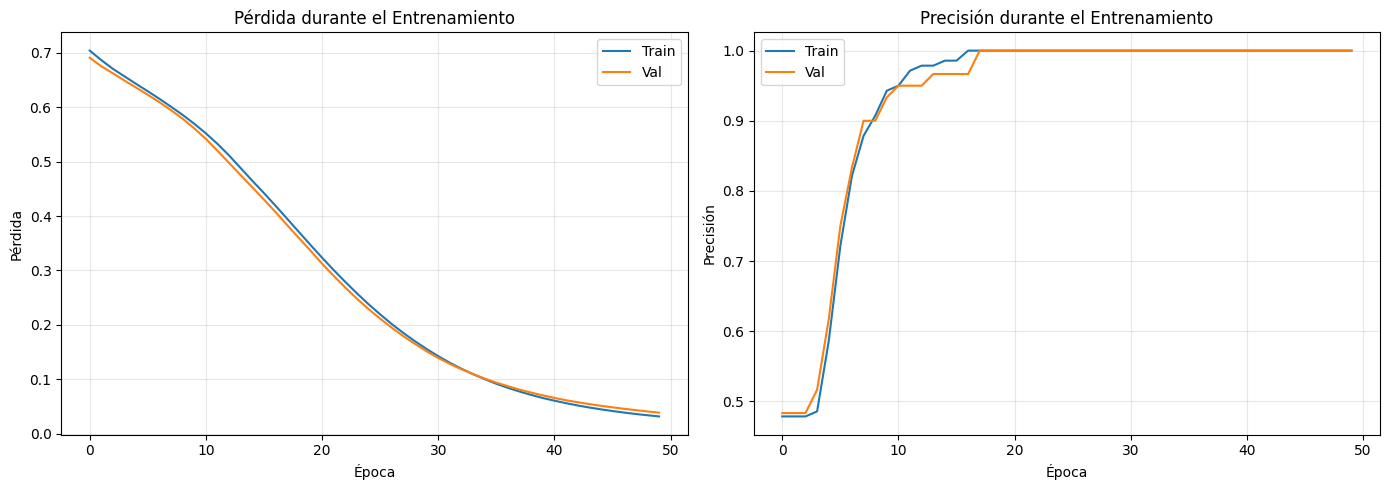

In [73]:
# PASO 5: Visualizar resultados
# EJERCICIO 12: Completa la visualización
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(historial_final.history['loss'], label='Train')
plt.plot(historial_final.history['val_loss'], label='Val')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el Entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(historial_final.history['accuracy'], label='Train')
plt.plot(historial_final.history['val_accuracy'], label='Val')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Precisión durante el Entrenamiento')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

💡 **PISTA GLOBAL para evaluación:** Usa evaluate() para obtener loss y accuracy en test. Usa predict() para obtener predicciones. Para seleccionar elementos aleatorios de un array, usa np.random.choice(). Para iterar, usa range() con len(). Accede a predicciones con indexación: pred[i][0]. Usa operadores de comparación (>, ==) para clasificar y verificar.

In [74]:
# PASO 6: Evaluación final
# EJERCICIO 13: Completa la evaluación y predicciones
print("\n📊 EVALUACIÓN FINAL")
print("="*60)

loss_final, acc_final = modelo_final.evaluate(X_test, y_test, verbose=0)
print(f"Pérdida en test: {loss_final:.4f}")
print(f"Precisión en test: {acc_final:.2%}")
print()

# Predicciones de ejemplo
print("🔮 EJEMPLOS DE PREDICCIONES:")
ejemplos_indices = np.random.choice(np.arange(len(X_test)), 10, replace=False)
X_ejemplos = X_test[ejemplos_indices]
y_ejemplos = y_test[ejemplos_indices]
predicciones = modelo_final.predict(X_ejemplos, verbose=0)

for i in range(len(X_ejemplos)):
    pred = predicciones[i][0]
    clase_pred = "Par" if pred > 0.5 else "Impar"
    clase_real = "Par" if y_ejemplos[i] == 1 else "Impar"
    correcto = "✅" if (pred > 0.5) == y_ejemplos[i] else "❌"
    print(f"   Real: {clase_real:5s} | Pred: {pred:.4f} ({clase_pred:5s}) {correcto}")

print("\n🎉 ¡PROYECTO COMPLETADO!")


📊 EVALUACIÓN FINAL
Pérdida en test: 0.0386
Precisión en test: 100.00%

🔮 EJEMPLOS DE PREDICCIONES:
   Real: Impar | Pred: 0.0595 (Impar) ✅
   Real: Par   | Pred: 0.9846 (Par  ) ✅
   Real: Impar | Pred: 0.0385 (Impar) ✅
   Real: Impar | Pred: 0.0516 (Impar) ✅
   Real: Impar | Pred: 0.0608 (Impar) ✅
   Real: Impar | Pred: 0.0292 (Impar) ✅
   Real: Impar | Pred: 0.0189 (Impar) ✅
   Real: Impar | Pred: 0.0161 (Impar) ✅
   Real: Par   | Pred: 0.7265 (Par  ) ✅
   Real: Par   | Pred: 0.9807 (Par  ) ✅

🎉 ¡PROYECTO COMPLETADO!


---

## 🚀 EJERCICIO FINAL: Crea tu propio clasificador desde CERO

💡 **OBJETIVO:** Implementa un clasificador completo que determine si un número es múltiplo de 3, utilizando TODO lo aprendido. Tendrás que escribir casi todo el código tú mismo.

💡 **PISTA GLOBAL:** Vas a seguir estos pasos: 1) Generar datos sintéticos con características que correlacionen con múltiplos de 3, 2) Dividir en train/test, 3) Crear y compilar una red neuronal profunda, 4) Entrenar con validación, 5) Visualizar curvas de aprendizaje, 6) Evaluar y predecir. Usa el proyecto anterior como referencia de estructura.

🎯 PROYECTO: CLASIFICADOR DE MÚLTIPLOS DE 3
Datos generados: 300 ejemplos
Múltiplos de 3: 109 (36.3%)

Train: 210 | Test: 90

Arquitectura del modelo:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 20)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)


Entrenando...


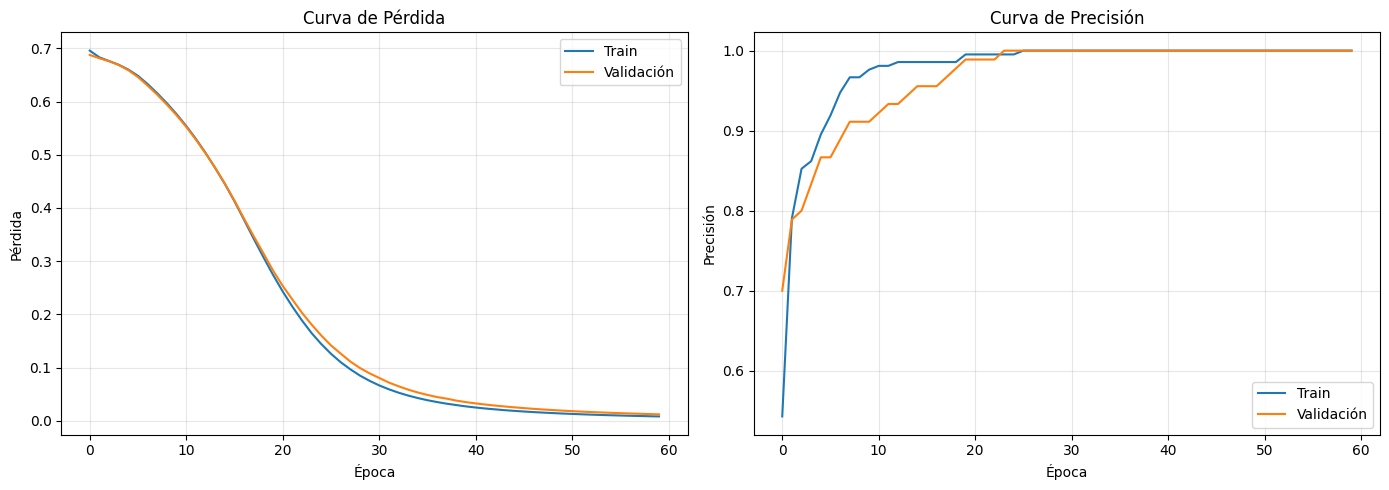


📊 RESULTADOS FINALES
Loss en test: 0.0119
Accuracy en test: 100.00%

🔮 PREDICCIONES DE EJEMPLO:
   Real: No  | Pred: 0.001 (No ) ✅
   Real: No  | Pred: 0.021 (No ) ✅
   Real: No  | Pred: 0.003 (No ) ✅
   Real: No  | Pred: 0.001 (No ) ✅
   Real: No  | Pred: 0.001 (No ) ✅
   Real: Sí  | Pred: 0.999 (Sí ) ✅
   Real: No  | Pred: 0.012 (No ) ✅
   Real: Sí  | Pred: 1.000 (Sí ) ✅
   Real: No  | Pred: 0.012 (No ) ✅
   Real: Sí  | Pred: 0.985 (Sí ) ✅
   Real: No  | Pred: 0.010 (No ) ✅
   Real: No  | Pred: 0.019 (No ) ✅
   Real: Sí  | Pred: 0.997 (Sí ) ✅
   Real: No  | Pred: 0.003 (No ) ✅
   Real: No  | Pred: 0.000 (No ) ✅

🎉 ¡EJERCICIO FINAL COMPLETADO!


In [75]:
# EJERCICIO 14: PROYECTO COMPLETO - Clasificador de múltiplos de 3

print("🎯 PROYECTO: CLASIFICADOR DE MÚLTIPLOS DE 3")
print("="*60)

# PASO 1: Generar datos
np.random.seed(100)
n = 300

# Genera números aleatorios del 0 al 149
numeros = np.random.randint(0, 150, n)

# Crea la etiqueta: 1 si es múltiplo de 3, 0 si no
es_multiplo_3 = (numeros % 3 == 0).astype(int)

# Crea matriz de características X
X = np.column_stack([
    numeros / 150,
    (numeros % 3) + np.random.randn(n) * 0.1,
    (numeros // 50) / 3,
    np.random.randn(n)
])

y = es_multiplo_3

print(f"Datos generados: {len(X)} ejemplos")
print(f"Múltiplos de 3: {sum(y)} ({sum(y)/len(y)*100:.1f}%)")
print()

# PASO 2: Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print(f"Train: {len(X_train)} | Test: {len(X_test)}")
print()

# PASO 3: Crear modelo
modelo_mult3 = Sequential([
    Dense(20, input_dim=4, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compila el modelo
modelo_mult3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Arquitectura del modelo:")
modelo_mult3.summary()
print()

# PASO 4: Entrenar
print("Entrenando...")
hist_mult3 = modelo_mult3.fit(
    X_train,
    y_train,
    epochs=60,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=0
)

# PASO 5: Visualizar
plt.figure(figsize=(14, 5))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(hist_mult3.history['loss'])
plt.plot(hist_mult3.history['val_loss'])
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida')
plt.legend(['Train', 'Validación'])
plt.grid(True, alpha=0.3)

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(hist_mult3.history['accuracy'])
plt.plot(hist_mult3.history['val_accuracy'])
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Curva de Precisión')
plt.legend(['Train', 'Validación'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# PASO 6: Evaluar
print("\n📊 RESULTADOS FINALES")
print("="*60)

loss_test, acc_test = modelo_mult3.evaluate(X_test, y_test, verbose=0)

print(f"Loss en test: {loss_test:.4f}")
print(f"Accuracy en test: {acc_test:.2%}")

# PASO 7: Predecir ejemplos
print("\n🔮 PREDICCIONES DE EJEMPLO:")

# Selecciona 15 ejemplos aleatorios del test
indices = np.random.choice(len(X_test), 15, replace=False)

X_muestra = X_test[indices]
y_muestra = y_test[indices]
preds = modelo_mult3.predict(X_muestra, verbose=0)

# Muestra las predicciones en un loop
for i in range(len(X_muestra)):
    p = preds[i][0]
    clase_p = "Sí" if p > 0.5 else "No"
    clase_r = "Sí" if y_muestra[i] == 1 else "No"
    ok = "✅" if (p > 0.5) == y_muestra[i] else "❌"
    print(f"   Real: {clase_r:3s} | Pred: {p:.3f} ({clase_p:3s}) {ok}")

print("\n🎉 ¡EJERCICIO FINAL COMPLETADO!")

---

## 🧠 EJERCICIO DE COMPRENSIÓN: Análisis de arquitecturas

💡 **PISTA GLOBAL:** Vas a calcular el número de parámetros manualmente. La fórmula para una capa Dense es: (input_size × output_size) + output_size. El primer término son los pesos (weights) y el segundo son los sesgos (bias). Para calcular parámetros totales, suma los parámetros de cada capa. Usa operadores aritméticos básicos.

In [76]:
# EJERCICIO 15: Calcula manualmente los parámetros de esta red

print("🧠 ANÁLISIS DE ARQUITECTURA")
print("="*60)
print("\nRed: Input(10) → Dense(16) → Dense(8) → Dense(1)")
print()

# Capa 1: Input(10) → Dense(16)
input_layer1 = 10
output_layer1 = 16
params_layer1 = (input_layer1 * output_layer1) + output_layer1

# Capa 2: Dense(16) → Dense(8)
input_layer2 = 16
output_layer2 = 8
params_layer2 = (input_layer2 * output_layer2) + output_layer2

# Capa 3: Dense(8) → Dense(1)
input_layer3 = 8
output_layer3 = 1
params_layer3 = (input_layer3 * output_layer3) + output_layer3

# Total
total_params = params_layer1 + params_layer2 + params_layer3

print(f"Parámetros Capa 1: {params_layer1}")
print(f"Parámetros Capa 2: {params_layer2}")
print(f"Parámetros Capa 3: {params_layer3}")
print(f"\n📊 TOTAL: {total_params} parámetros")
print()

# Verificación con Keras
print("✅ Verificación con Keras:")
modelo_verificar = Sequential([
    Dense(16, input_dim=10),
    Dense(8),
    Dense(1)
])
modelo_verificar.summary()

🧠 ANÁLISIS DE ARQUITECTURA

Red: Input(10) → Dense(16) → Dense(8) → Dense(1)

Parámetros Capa 1: 176
Parámetros Capa 2: 136
Parámetros Capa 3: 9

📊 TOTAL: 321 parámetros

✅ Verificación con Keras:


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

---

## 🎓 RESUMEN: ¿Qué has aprendido?

### ✅ Conceptos clave:

| Concepto | Qué es | Ejemplo |
|----------|--------|--------|
| **Sequential** | Modelo de capas secuenciales | `Sequential([...])` |
| **Dense** | Capa totalmente conectada | `Dense(8, activation='relu')` |
| **Activación** | Función no-lineal | ReLU, Sigmoid, Tanh |
| **Compilar** | Configurar el aprendizaje | `compile(optimizer, loss, metrics)` |
| **Entrenar** | Ajustar pesos | `fit(X, y, epochs, batch_size)` |
| **Evaluar** | Medir rendimiento | `evaluate(X_test, y_test)` |
| **Predecir** | Clasificar nuevos datos | `predict(X_nuevo)` |

### 🧠 Pipeline completo:

```python
# 1. Crear modelo
modelo = Sequential([
    Dense(16, input_dim=10, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# 2. Compilar
modelo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 3. Entrenar
historial = modelo.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test)
)

# 4. Evaluar
loss, acc = modelo.evaluate(X_test, y_test)

# 5. Predecir
predicciones = modelo.predict(X_nuevo)
```

---

## 🚀 ¿Qué sigue?

En el **Notebook 6** aprenderás:
- ⚠️ **Overfitting**: Qué es y cómo detectarlo
- 🛡️ **Dropout**: Regularización para evitar overfitting
- 📏 **Regularización L2**: Penalizar pesos grandes
- ⏹️ **Early Stopping**: Parar el entrenamiento automáticamente

---



## 🎉 ¡FELICIDADES!

Has completado el **Notebook 5 AVANZADO: Introducción a Redes Neuronales con Keras**.

Este es el notebook más importante del curso. Ahora sabes:
- 🏗️ Construir arquitecturas de redes neuronales complejas
- ⚙️ Configurar el proceso de aprendizaje con parámetros precisos
- 🏋️ Entrenar modelos con tus propios datos usando métodos de Keras
- 📊 Monitorear y evaluar el rendimiento con métricas
- 🔮 Usar modelos para hacer predicciones y clasificaciones
- 🐍 Aplicar operadores de Python, indexación de numpy y funciones matemáticas
- 🧠 Implementar componentes de ML desde cero

**💪 ¡Estás listo para el Notebook 6 sobre Overfitting y Regularización!**